In [2]:
import Pkg
Pkg.add("ITensors")
Pkg.add("NPZ")
Pkg.add("GLM")
Pkg.add("Plots")

    Updating registry at `C:\Users\Administrator\.julia\registries\General.toml`
   Resolving package versions...
   Installed KrylovKit ──────── v0.8.1
   Installed StridedViews ───── v0.3.1
   Installed ConstructionBase ─ v1.5.8
   Installed NDTensors ──────── v0.3.42
   Installed ITensors ───────── v0.6.17
    Updating `C:\Users\Administrator\.julia\environments\v1.10\Project.toml`
  [9136182c] + ITensors v0.6.17
    Updating `C:\Users\Administrator\.julia\environments\v1.10\Manifest.toml`
  [7d9f7c33] + Accessors v0.1.37
  [dce04be8] + ArgCheck v2.3.0
  [4c555306] + ArrayLayouts v1.10.3
⌅ [198e06fe] + BangBang v0.3.40
  [9718e550] + Baselet v0.1.1
  [c3b6d118] + BitIntegers v0.3.1
  [8e7c35d0] + BlockArrays v1.1.0
  [a33af91c] + CompositionsBase v0.1.2
  [187b0558] + ConstructionBase v1.5.8
  [244e2a9f] + DefineSingletons v0.1.2
  [85a47980] + Dictionaries v0.4.2
  [da5c29d0] + EllipsisNotation v1.8.0
  [e189563c] + ExternalDocstrings v0.1.1
  [41a02a25] + Folds v0.2.10
  [d9f16b24

In [6]:
Pkg.add("TensorOperations")
Pkg.add("SparseArrays")
Pkg.add("Combinatorics")

   Resolving package versions...
   Installed TensorOperations ─ v5.0.0
    Updating `C:\Users\Administrator\.julia\environments\v1.10\Project.toml`
  [6aa20fa7] + TensorOperations v5.0.0
    Updating `C:\Users\Administrator\.julia\environments\v1.10\Manifest.toml`
  [8ac3fa9e] + LRUCache v1.6.1
  [6aa20fa7] + TensorOperations v5.0.0
Precompiling project...
  ✓ LRUCache
  ✓ LRUCache → SerializationExt
  ✓ TensorOperations
  ✓ TensorOperations → TensorOperationsChainRulesCoreExt
  4 dependencies successfully precompiled in 35 seconds. 411 already precompiled.
   Resolving package versions...
    Updating `C:\Users\Administrator\.julia\environments\v1.10\Project.toml`
  [2f01184e] + SparseArrays v1.10.0
  No Changes to `C:\Users\Administrator\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\Administrator\.julia\environments\v1.10\Project.toml`
  [861a8166] + Combinatorics v1.0.2
    Updating `C:\Users\Administrator\.julia\environments\v1.10

In [2]:

using ITensors
using Pkg
using NPZ

In [3]:

N = 64

# Make an array of N Index objects with alternating
# "S=1/2" and "S=1" tags on odd versus even sites
# (The first argument n->isodd(n) ... is an 
# on-the-fly function mapping integers to strings)

sites = siteinds("S=1/2", N)
entangle_E = []
pa = []
P0_list = []
P1_list = []

angle_list = [0.0, 0.025*pi, 0.05*pi, 0.1*pi, 0.15*pi, 0.2*pi, 0.25*pi, 0.3*pi, 0.35*pi, 0.4*pi, 0.45*pi, 0.5*pi]
ITensors.op(::OpName"P0",::SiteType"S=1/2") =
 [1 0
  0 0]
ITensors.op(::OpName"P1",::SiteType"S=1/2") =
 [0 0
  0 1]

for angle in angle_list
    all_tensors = []
    os = OpSum()
    os -= 4.0*cos(angle)^2, "Sz",1,"Sx",2
    os -= 4.0*cos(angle)*sin(angle), "Sz",1,"Sz",2
    os += 4.0*sin(angle)^2, "Sx",1,"Sz",2
    os += 4.0*cos(angle)*sin(angle), "Sx",1,"Sx",2
    
    os -= 8.0*cos(angle)^3, "Sx", N-2,"Sz",N-1,"Sz",N
    os -= 8.0*cos(angle)^2*sin(angle), "Sz",N-2,"Sz",N-1, "Sz",N
    os += 8.0*cos(angle)^2*sin(angle), "Sx",N-2,"Sx",N-1, "Sz",N
    os += 8.0*cos(angle)^2*sin(angle), "Sx",N-2,"Sz",N-1, "Sx",N
    os += 8.0*cos(angle)*sin(angle)^2, "Sz",N-2,"Sx",N-1, "Sz",N
    os += 8.0*cos(angle)*sin(angle)^2, "Sz",N-2,"Sz",N-1, "Sx",N
    os -= 8.0*cos(angle)*sin(angle)^2, "Sx",N-2,"Sx",N-1, "Sx",N
    os -= 8.0*sin(angle)^3, "Sz",N-2,"Sx",N-1, "Sx",N
    
    os -= 4.0*cos(angle)^2, "Sx", N-1,"Sx",N
    os -= 4.0*cos(angle)*sin(angle), "Sx", N-1,"Sz",N
    os -= 4.0*sin(angle)^2, "Sz", N-1,"Sz",N
    os -= 4.0*cos(angle)*sin(angle), "Sz", N-1,"Sx",N
    
    for j=1:N-3
        os -= 8.0*cos(angle)^3, "Sx",j,"Sz",j+1,"Sx",j+2
        os -= 8.0*cos(angle)^2*sin(angle), "Sz",j,"Sz",j+1, "Sx", j+2
        os += 8.0*cos(angle)^2*sin(angle), "Sx",j,"Sx",j+1, "Sx", j+2
        os -= 8.0*cos(angle)^2*sin(angle), "Sx",j,"Sz",j+1,"Sz", j+2
        os += 8.0*cos(angle)*sin(angle)^2, "Sz",j,"Sx",j+1, "Sx", j+2
        os += 8.0*cos(angle)*sin(angle)^2, "Sx",j,"Sx",j+1, "Sz", j+2
        os -= 8.0*cos(angle)*sin(angle)^2, "Sz",j,"Sz",j+1,"Sz", j+2
        os += 8.0*sin(angle)^3, "Sz",j,"Sx",j+1,"Sz", j+2
    end
    
    H = MPO(os, sites)
    
    nsweeps = 5
    maxdim = [10,20,40,80,200]
    mindim = [2, 2, 2, 2, 2]
    cutoff = [1E-6]
    noise = [1E-5, 1E-6, 1E-7, 1E-8, 0.0]
    psi0 = randomMPS(sites, 10)
    ang = round(angle, digits = 3)
    
    energy, psi = dmrg(H, psi0; nsweeps, maxdim, mindim, cutoff, noise)
    save_dir = "mps_tensors"
    isdir(save_dir) || mkdir(save_dir)  # Create the directory if it doesn't exist
    
    # Save the initial tensor as an .npy file
    
    tensor = psi[1]
    tensor_array = Array(tensor, siteinds(psi, 1), linkinds(psi, 1))  # Convert the ITensor to a dense array
    file_path = joinpath(save_dir, "ES_tensor_init_$(N)_angle_$(ang).npy")  # File path for the .npy file
    npzwrite(file_path, tensor_array)  # Save the array as an .npy file
    # Iterate over each site in the MPS and save the tensor as an .npy file
    
    for i in 2:length(psi)-1
        tensor = psi[i] # Convert the ITensor to a dense array
        tensor_array = Array(tensor, siteinds(psi, i), linkinds(psi, i), linkinds(psi, i-1))  # Convert the ITensor to a dense array
        push!(all_tensors, tensor_array) 
    end
    
    file_path = joinpath(save_dir, "ES_tensor_$(N)_angle_$(ang).npy")  # File path for the .npy file
    stacked_tensor = cat(all_tensors..., dims=ndims(all_tensors[1]) + 1)
    npzwrite(file_path, stacked_tensor)  # Save the array as an .npy file
    
    tensor = psi[length(psi)]
    tensor_array = Array(tensor, siteinds(psi, length(psi)), linkinds(psi, length(psi)-1))  # Convert the ITensor to a dense array
    file_path = joinpath(save_dir, "ES_tensor_last_$(N)_angle_$(ang).npy")  # File path for the .npy file
    npzwrite(file_path, tensor_array)  # Save the array as an .npy file
    
    sample_array = [] 
    for i in 1:1024
        push!(sample_array, sample(psi))
    end
    sample_array = transpose(hcat(sample_array...))
    file_path = joinpath(save_dir, "ES_sample_$(N)_angle_$(ang).npy")  # File path for the .npy file
    npzwrite(file_path, Array(sample_array))  # Save the array as an .npy file
end


After sweep 1 energy=-63.99973755740892  maxlinkdim=3 maxerr=9.85E-04 time=59.638
After sweep 2 energy=-63.999999999999865  maxlinkdim=2 maxerr=1.17E-08 time=0.137
After sweep 3 energy=-64.00000000000017  maxlinkdim=2 maxerr=5.55E-16 time=0.162
After sweep 4 energy=-64.00000000000016  maxlinkdim=2 maxerr=7.77E-16 time=0.112
After sweep 5 energy=-64.00000000000009  maxlinkdim=2 maxerr=7.77E-16 time=0.642
After sweep 1 energy=-63.99947673964343  maxlinkdim=4 maxerr=1.37E-03 time=0.151
After sweep 2 energy=-64.00000000000004  maxlinkdim=2 maxerr=1.52E-08 time=0.121
After sweep 3 energy=-63.99999999999989  maxlinkdim=2 maxerr=6.21E-16 time=0.113
After sweep 4 energy=-63.999999999999886  maxlinkdim=2 maxerr=6.66E-16 time=0.110
After sweep 5 energy=-63.999999999999886  maxlinkdim=2 maxerr=5.98E-16 time=0.119
After sweep 1 energy=-63.998717618628284  maxlinkdim=6 maxerr=1.86E-03 time=0.139
After sweep 2 energy=-64.00000000000014  maxlinkdim=2 maxerr=2.25E-08 time=0.113
After sweep 3 energy=-6

In [11]:
using NPZ, LinearAlgebra, TensorOperations, SparseArrays, Combinatorics

# Load the MPS tensors
L = 16
p = 1
ang = round(pi/2, digits = 3)
M0 = npzread("mps_tensors/ES_tensor_init_$(L * p)_angle_$(ang).npy")
M = npzread("mps_tensors/ES_tensor_$(L * p)_angle_$(ang).npy")
Mlast = npzread("mps_tensors/ES_tensor_last_$(L * p)_angle_$(ang).npy")
@show M

M = [-0.06611751765521796 -0.9978118429138392; 3.0469924824731655e-17 0.0;;; -2.116665803040969e-17 -2.90673689260757e-17; -0.9978118429138391 0.06611751765521975;;;; -0.20932279214893887 -0.6246688134896202; -0.7133278300465795 0.23903189958974047;;; 0.23903189958974105 0.7133278300465796; -0.6246688134896208 0.2093227921489382;;;; -0.7469341510054236 -0.49331014637455023; 0.24567921930914294 -0.37198950891843263;;; -0.3719895089184331 -0.24567921930914224; -0.49331014637455217 0.7469341510054225;;;; -0.07935615847643003 -0.183962802231743; 0.8995947238118296 -0.38805878471801936;;; -0.38805878471802097 -0.8995947238118286; -0.18396280223174322 0.07935615847642973;;;; 0.760482885674773 0.5341909744132733; 0.21221382921863696 -0.30211102949003904;;; 0.3021110294900398 0.21221382921863574; -0.5341909744132767 0.7604828856747705;;;; -0.9482396062402426 0.26682743730328806; 0.046637916023316184 0.16573977388819874;;; 0.165739773888199 -0.046637916023315545; 0.26682743730329095 0.948239606

2×2×2×14 Array{Float64, 4}:
[:, :, 1, 1] =
 -0.0661175    -0.997812
  3.04699e-17   0.0

[:, :, 2, 1] =
 -2.11667e-17  -2.90674e-17
 -0.997812      0.0661175

[:, :, 1, 2] =
 -0.209323  -0.624669
 -0.713328   0.239032

[:, :, 2, 2] =
  0.239032  0.713328
 -0.624669  0.209323

[:, :, 1, 3] =
 -0.746934  -0.49331
  0.245679  -0.37199

[:, :, 2, 3] =
 -0.37199  -0.245679
 -0.49331   0.746934

;;;; … 

[:, :, 1, 12] =
 0.874228    0.46491
 0.0657075  -0.123558

[:, :, 2, 12] =
  0.123558  0.0657075
 -0.46491   0.874228

[:, :, 1, 13] =
 -0.000557061   0.292308
 -0.956322     -0.0018225

[:, :, 2, 13] =
 -0.0018225  0.956322
  0.292308   0.000557061

[:, :, 1, 14] =
 -0.499046  0.499046
  0.500952  0.500952

[:, :, 2, 14] =
 -0.500952   0.500952
 -0.499046  -0.499046

In [4]:

N = 64

# Make an array of N Index objects with alternating
# "S=1/2" and "S=1" tags on odd versus even sites
# (The first argument n->isodd(n) ... is an 
# on-the-fly function mapping integers to strings)

sites = siteinds("S=1/2", N)
entangle_E = []
pa = []
P0_list = []
P1_list = []

angle_list = [0.0, 0.05*pi, 0.1*pi, 0.15*pi, 0.2*pi, 0.25*pi, 0.3*pi, 0.35*pi, 0.4*pi, 0.45*pi, 0.5*pi]
ITensors.op(::OpName"P0",::SiteType"S=1/2") =
 [1 0
  0 0]
ITensors.op(::OpName"P1",::SiteType"S=1/2") =
 [0 0
  0 1]

for angle in angle_list
    all_tensors = []
    os = OpSum()
    os -= 4.0*cos(angle)^2, "Sx",1,"Sz",2
    os -= 4.0*cos(angle)*sin(angle), "Sz",1,"Sz",2
    os += 4.0*sin(angle)^2, "Sz",1,"Sx",2
    os += 4.0*cos(angle)*sin(angle), "Sx",1,"Sx",2
    
    os -= 4.0*cos(angle)^2, "Sz", N-1,"Sx",N
    os -= 4.0*cos(angle)*sin(angle), "Sz", N-1,"Sz",N
    os += 4.0*sin(angle)^2, "Sx", N-1,"Sz",N
    os += 4.0*cos(angle)*sin(angle), "Sx", N-1,"Sx",N
    
    for j=1:N-2
        os -= 8.0*cos(angle)^3, "Sz",j,"Sx",j+1,"Sz",j+2
        os += 8.0*cos(angle)^2*sin(angle), "Sx",j,"Sx",j+1, "Sz", j+2
        os -= 8.0*cos(angle)^2*sin(angle), "Sz",j,"Sz",j+1, "Sz", j+2
        os += 8.0*cos(angle)^2*sin(angle), "Sz",j,"Sx",j+1,"Sx", j+2
        os += 8.0*cos(angle)*sin(angle)^2, "Sx",j,"Sz",j+1, "Sz", j+2
        os += 8.0*cos(angle)*sin(angle)^2, "Sz",j,"Sz",j+1, "Sx", j+2
        os -= 8.0*cos(angle)*sin(angle)^2, "Sx",j,"Sx",j+1,"Sx", j+2
        os -= 8.0*sin(angle)^3, "Sx",j,"Sz",j+1,"Sx", j+2
    end
    
    H = MPO(os, sites)
    
    nsweeps = 5
    maxdim = [10,20,40,80,200]
    mindim = [2, 2, 2, 2, 2]
    cutoff = [1E-6]
    noise = [1E-5, 1E-6, 1E-7, 1E-8, 0.0]
    psi0 = randomMPS(sites, 10)
    ang = round(angle, digits = 3)
    
    energy, psi = dmrg(H, psi0; nsweeps, maxdim, mindim, cutoff, noise)
    save_dir = "mps_tensors"
    isdir(save_dir) || mkdir(save_dir)  # Create the directory if it doesn't exist
    
    # Save the initial tensor as an .npy file
    
    tensor = psi[1]
    tensor_array = Array(tensor, siteinds(psi, 1), linkinds(psi, 1))  # Convert the ITensor to a dense array
    file_path = joinpath(save_dir, "cluster_tensor_init_$(N)_angle_$(ang).npy")  # File path for the .npy file
    npzwrite(file_path, tensor_array)  # Save the array as an .npy file
    # Iterate over each site in the MPS and save the tensor as an .npy file
    
    for i in 2:length(psi)-1
        tensor = psi[i] # Convert the ITensor to a dense array
        tensor_array = Array(tensor, siteinds(psi, i), linkinds(psi, i), linkinds(psi, i-1))  # Convert the ITensor to a dense array
        push!(all_tensors, tensor_array) 
    end
    
    file_path = joinpath(save_dir, "cluster_tensor_$(N)_angle_$(ang).npy")  # File path for the .npy file
    stacked_tensor = cat(all_tensors..., dims=ndims(all_tensors[1]) + 1)
    npzwrite(file_path, stacked_tensor)  # Save the array as an .npy file
    tensor = psi[length(psi)]
    tensor_array = Array(tensor, siteinds(psi, length(psi)), linkinds(psi, length(psi)-1))  # Convert the ITensor to a dense array
    file_path = joinpath(save_dir, "cluster_tensor_last_$(N)_angle_$(ang).npy")  # File path for the .npy file
    npzwrite(file_path, tensor_array)  # Save the array as an .npy file
    
    sample_array = [] 
    for i in 1:1024
        push!(sample_array, sample(psi))
    end
    sample_array = transpose(hcat(sample_array...))
    file_path = joinpath(save_dir, "cluster_sample_$(N)_angle_$(ang).npy")  # File path for the .npy file
    npzwrite(file_path, Array(sample_array))  # Save the array as an .npy file
end


After sweep 1 energy=-63.99970747406443  maxlinkdim=4 maxerr=1.04E-03 time=0.200
After sweep 2 energy=-64.00000000000016  maxlinkdim=2 maxerr=1.35E-09 time=0.131
After sweep 3 energy=-64.00000000000009  maxlinkdim=2 maxerr=6.66E-16 time=0.120
After sweep 4 energy=-64.00000000000016  maxlinkdim=2 maxerr=5.55E-16 time=0.116
After sweep 5 energy=-63.999999999999936  maxlinkdim=2 maxerr=6.66E-16 time=0.115
After sweep 1 energy=-63.99974782784794  maxlinkdim=4 maxerr=1.58E-03 time=0.147
After sweep 2 energy=-63.999999999999936  maxlinkdim=2 maxerr=2.48E-09 time=0.125
After sweep 3 energy=-63.99999999999993  maxlinkdim=2 maxerr=4.91E-16 time=0.127
After sweep 4 energy=-64.00000000000024  maxlinkdim=2 maxerr=7.77E-16 time=0.140
After sweep 5 energy=-64.00000000000026  maxlinkdim=2 maxerr=5.34E-16 time=0.128
After sweep 1 energy=-63.99980237731039  maxlinkdim=4 maxerr=1.36E-03 time=0.178
After sweep 2 energy=-64.00000000000016  maxlinkdim=2 maxerr=5.08E-09 time=0.140
After sweep 3 energy=-64.0

In [3]:

N = 64

# Make an array of N Index objects with alternating
# "S=1/2" and "S=1" tags on odd versus even sites
# (The first argument n->isodd(n) ... is an 
# on-the-fly function mapping integers to strings)

sites = siteinds("S=1/2", N)
entangle_E = []
pa = []
N = 64
i = 2
b = 2
P0_list = []
P1_list = []
angle_list = [0.0, 0.05*pi, 0.1*pi, 0.15*pi, 0.2*pi, 0.25*pi, 0.3*pi, 0.35*pi, 0.4*pi, 0.45*pi, 0.5*pi]

ITensors.op(::OpName"P0",::SiteType"S=1/2") =
 [1 0
  0 0]
ITensors.op(::OpName"P1",::SiteType"S=1/2") =
 [0 0
  0 1]

for angle in angle_list
    
    all_tensors = []
    os = OpSum()
    os -= 4.0*cos(angle)^2, "Sz",1,"Sx",2
    os -= 4.0*cos(angle)*sin(angle), "Sz",1,"Sz",2
    os += 4.0*sin(angle)^2, "Sx",1,"Sz",2
    os += 4.0*cos(angle)*sin(angle), "Sx",1,"Sx",2
    
    os -= 8.0*cos(angle)^3, "Sx", N-2,"Sz",N-1,"Sz",N
    os -= 8.0*cos(angle)^2*sin(angle), "Sz",N-2,"Sz",N-1, "Sz",N
    os += 8.0*cos(angle)^2*sin(angle), "Sx",N-2,"Sx",N-1, "Sz",N
    os += 8.0*cos(angle)^2*sin(angle), "Sx",N-2,"Sz",N-1, "Sx",N
    os += 8.0*cos(angle)*sin(angle)^2, "Sz",N-2,"Sx",N-1, "Sz",N
    os += 8.0*cos(angle)*sin(angle)^2, "Sz",N-2,"Sz",N-1, "Sx",N
    os -= 8.0*cos(angle)*sin(angle)^2, "Sx",N-2,"Sx",N-1, "Sx",N
    os -= 8.0*sin(angle)^3, "Sz",N-2,"Sx",N-1, "Sx",N
    
    os -= 4.0*cos(angle)^2, "Sx", N-1,"Sx",N
    os -= 4.0*cos(angle)*sin(angle), "Sx", N-1,"Sz",N
    os -= 4.0*sin(angle)^2, "Sz", N-1,"Sz",N
    os -= 4.0*cos(angle)*sin(angle), "Sz", N-1,"Sx",N
    
    for j=1:N-3
        os -= 8.0*cos(angle)^3, "Sx",j,"Sz",j+1,"Sx",j+2
        os -= 8.0*cos(angle)^2*sin(angle), "Sz",j,"Sz",j+1, "Sx", j+2
        os += 8.0*cos(angle)^2*sin(angle), "Sx",j,"Sx",j+1, "Sx", j+2
        os -= 8.0*cos(angle)^2*sin(angle), "Sx",j,"Sz",j+1,"Sz", j+2
        os += 8.0*cos(angle)*sin(angle)^2, "Sz",j,"Sx",j+1, "Sx", j+2
        os += 8.0*cos(angle)*sin(angle)^2, "Sx",j,"Sx",j+1, "Sz", j+2
        os -= 8.0*cos(angle)*sin(angle)^2, "Sz",j,"Sz",j+1,"Sz", j+2
        os += 8.0*sin(angle)^3, "Sz",j,"Sx",j+1,"Sz", j+2
    end

    H = MPO(os,sites)

    nsweeps = 5
    maxdim = [10,20,40,80,200]
    cutoff = [1E-10]
    mind = [3, 3, 3, 3, 3]
    noise = [1E-5, 1E-6, 1E-7, 1E-8, 0.0]
    psi0 = randomMPS(sites,10)

    energy, psi = dmrg(H, psi0; nsweeps, maxdim, cutoff, noise)
    for i in 2:12
        # Apply the projection operator to the MPS at site i
        entangle_Ei = 0
        for a in 1:2^(i-1)
            pa_i = 1
            ind = 2
            psi_i = deepcopy(psi)
            combination = digits(a, base = 2, pad = i - 1)
            reverse!(combination)
            for com in combination
                if com == 0
                    new_psi_i = op("P0", sites[ind])*psi_i[ind]
                    noprime!(new_psi_i)
                    psi_i[ind] = new_psi_i
                    ind += 1
                else
                    new_psi_i = op("P1", sites[ind])*psi_i[ind]
                    noprime!(new_psi_i)
                    psi_i[ind] = new_psi_i
                    ind += 1 
                end
            end
            
            pa_i = inner(psi, psi_i)
            
             # Normalize the MPS
            if inner(psi, psi_i) > 1e-32
                normalize!(psi_i)
                orthogonalize!(psi_i, b)
                U,S,V = svd(psi_i[b], (linkind(psi_i, b-1), siteind(psi_i,b)))
                SvN = 0.0
                for n=1:dim(S, 1)
                    p = S[n,n]^2
                    SvN -= p * log(p+1e-32)
                end
                entangle_Ei += SvN*pa_i
            end
        end
        push!(entangle_E, entangle_Ei)
    end
end


After sweep 1 energy=-63.99942422980188  maxlinkdim=10 maxerr=1.26E-03 time=24.969
After sweep 2 energy=-63.99999999074768  maxlinkdim=5 maxerr=9.95E-11 time=0.072
After sweep 3 energy=-63.999999999999844  maxlinkdim=2 maxerr=5.20E-14 time=0.052
After sweep 4 energy=-63.99999999999991  maxlinkdim=2 maxerr=6.66E-16 time=0.073
After sweep 5 energy=-64.00000000000001  maxlinkdim=2 maxerr=6.66E-16 time=0.271
After sweep 1 energy=-63.99932932154813  maxlinkdim=10 maxerr=1.17E-03 time=0.069
After sweep 2 energy=-63.99999997803342  maxlinkdim=7 maxerr=9.93E-11 time=0.059
After sweep 3 energy=-64.00000000000011  maxlinkdim=2 maxerr=1.57E-12 time=0.050
After sweep 4 energy=-63.99999999999996  maxlinkdim=2 maxerr=5.55E-16 time=0.050
After sweep 5 energy=-64.00000000000028  maxlinkdim=2 maxerr=7.77E-16 time=0.043
After sweep 1 energy=-63.999350443262216  maxlinkdim=10 maxerr=8.94E-04 time=0.066
After sweep 2 energy=-63.99999994361995  maxlinkdim=7 maxerr=9.94E-11 time=0.062
After sweep 3 energy=-

In [6]:
combination = digits(8, base = 2, pad = i - 1)
println(combination)

[0, 0, 0, 1]


In [21]:
println(reshaped_array[2, :])

[-0.5000443132061804, -0.5368348487169665, -0.6498196135987993, -0.8474581237116205, -1.146134098964071, -1.5743878762107146, -2.180953881156941, -3.0535397643714584, -4.384846308941102, -6.804799458202477, -34.134110884232726]


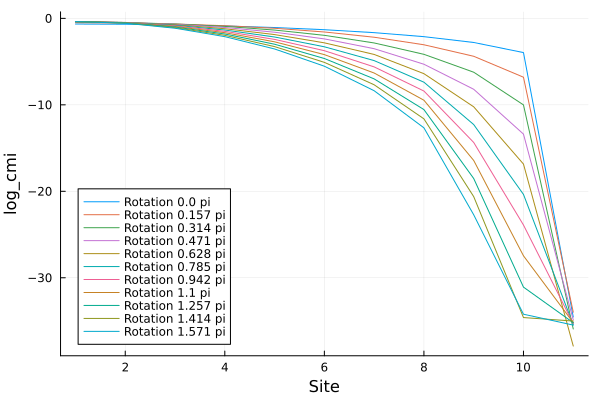

In [4]:
using Plots
reshaped_array = reshape(log.(abs.(entangle_E)), 11, 11)
# Number of lines (rows of the array)
num_lines = size(reshaped_array, 1)

# Create a plot with multiple lines
p = plot()
for i in 1:num_lines
    angle = round(angle_list[i], digits = 3)
    plot!(1:size(reshaped_array, 2), reshaped_array[i, :], label = "Rotation $angle pi")
end
xlabel!(p, "Site")
ylabel!(p, "log_cmi")
# Display the plot
display(p)


   Resolving package versions...
    Updating `C:\Users\Administrator\.julia\environments\v1.10\Project.toml`
  [38e38edf] + GLM v1.9.0
    Updating `C:\Users\Administrator\.julia\environments\v1.10\Manifest.toml`
  [38e38edf] + GLM v1.9.0
  [1277b4bf] + ShiftedArrays v2.0.0
  [3eaba693] + StatsModels v0.7.4
Precompiling project...
  ✓ ShiftedArrays
  ✓ StatsModels
  ✓ GLM
  3 dependencies successfully precompiled in 14 seconds. 416 already precompiled.


In [14]:
println(reshaped_array)

LoadError: UndefVarError: `reshaped_array` not defined

In [93]:

using GLM

# Example data
x = [1,2,3,4,5,6,7,8,9,10,11]  # Predictor variable
X = hcat(ones(length(x)), x)
slope_list = []
slope_error_list = []
for i in 1:length(angle_list)-1
    y = reshaped_array[i, :]    # Response variable
    model = lm(X, y)

    # Get standard errors of the coefficients
    coefficients = coef(model)
    coeff_errors = stderror(model)
    
    # The standard error of the slope is the second element
    slope = coefficients[2]
    slope_error = coeff_errors[2]
    
    println("Slope: ", slope)
    println("Standard error of the slope: ", slope_error)
    push!(slope_list, slope)
    push!(slope_error_list, slope_error)
end

Slope: 0.020286070069793587
Standard error of the slope: 0.0058135839379222145
Slope: 0.002907671812436001
Standard error of the slope: 0.005959471240601643
Slope: -0.04851863507274976
Standard error of the slope: 0.006262911482306906
Slope: -0.1345266574995507
Standard error of the slope: 0.006560667455971392
Slope: -0.25970580594515486
Standard error of the slope: 0.006751886011852888
Slope: -0.4342059602464314
Standard error of the slope: 0.006598591954030568
Slope: -0.6828697346489571
Standard error of the slope: 0.005774661209660949
Slope: -1.0591581121065976
Standard error of the slope: 0.004566880999911794
Slope: -2.0182926278329214
Standard error of the slope: 0.01956677708477406
Slope: -3.3485577081322733
Standard error of the slope: 0.11308197652843939


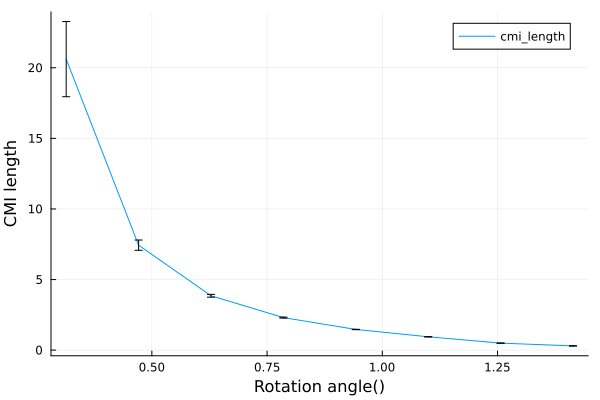

In [103]:
p = plot(angle_list[3:end-1], -1 ./ slope_list[3:end], yerr = (1 ./ slope_list[3:end]).^2 .* slope_error_list[3:end], label = "cmi_length")
xlabel!(p, "Rotation angle()")
ylabel!(p, "CMI length")